# Planet plot

In [1]:
from grnet.clusters import CellClasses
from grnet.dataset import load_dataset, load_metadata
from grnet.models import PC
from grnet.plot import planetplot
import matplotlib.pyplot as plt

## data loading

- data1: prototype1

In [2]:
data1 = load_dataset("prototype1")
meta1 = load_metadata("prototype1")

lst_data1 = [
    data1.loc[meta1.cluster == v, :].iloc[:, :10] for v in meta1.cluster.unique()
]

models1 = [PC(v) for v in lst_data1]

for v in models1:
    v.estimate()

dataset1 = CellClasses(
    models=models1,
    names=[f"cluster_{i + 1}\n(prototype1)" for i in range(len(lst_data1))],
    colors="rainbow"
)

- data2: prototype2

In [3]:
data2 = load_dataset("prototype2")
meta2 = load_metadata("prototype2")

lst_data2 = [
    data2.loc[meta2.cluster == v, :].iloc[:, :10] for v in meta2.cluster.unique()
]

models2 = [PC(v) for v in lst_data2]

for v in models2:
    v.estimate()

dataset2 = CellClasses(
    models=models2,
    names=[f"cluster_{i + 1}\n(prototype2)" for i in range(len(lst_data2))],
    colors="hsv"
)

## Plotting planet plot

- radius reflects difference between two clusters

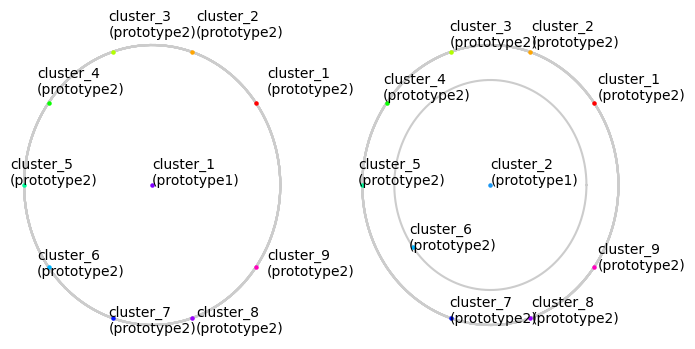

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

for i, v in enumerate(ax):

    planetplot(
        subjective=dataset1,
        objective=dataset2,
        ax=v, id=i
    )

    v.axis("off");

- default evaluation metric is `grnet.evaluations.d_asterisk`, which is an asymmetrical function

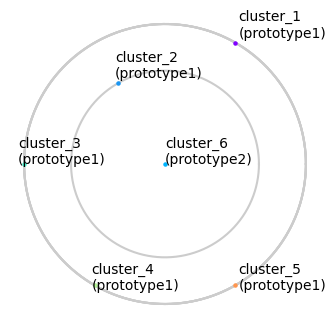

In [5]:
fig, ax = plt.subplots(figsize=(4, 4))

planetplot(
    subjective=dataset2,
    objective=dataset1,
    ax=ax, id=5
)

ax.axis("off");

## Customize plot aesthetics

### linecolor (default: ".2")

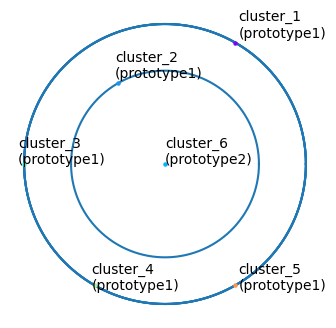

In [6]:
fig, ax = plt.subplots(figsize=(4, 4))

planetplot(
    subjective=dataset2,
    objective=dataset1,
    ax=ax, id=5, linecolor="C0"
)

ax.axis("off");

### s (default: 5)

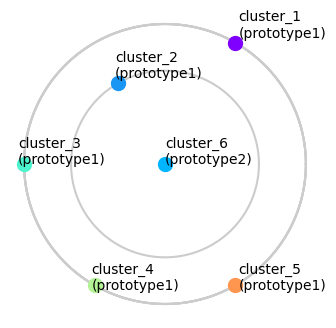

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))

planetplot(
    subjective=dataset2,
    objective=dataset1,
    ax=ax, id=5, s=100
)

ax.axis("off");

### n_dots (default: 1000)

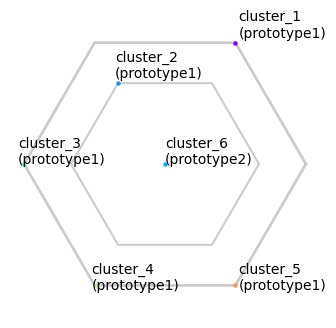

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

planetplot(
    subjective=dataset2,
    objective=dataset1,
    ax=ax, id=5, n_dots=7
)

ax.axis("off");

### zorder (default: 0)

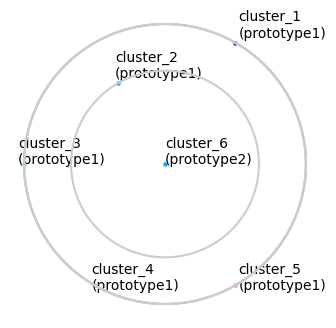

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))

planetplot(
    subjective=dataset2,
    objective=dataset1,
    ax=ax, id=5, zorder=5
)

ax.axis("off");

### kwargs regarding annotations

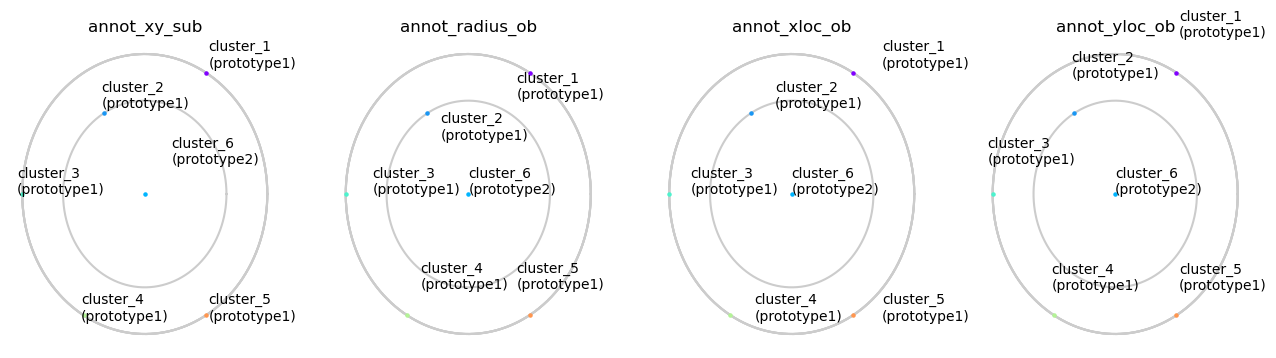

In [10]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

arguments = [
    {"annot_xy_sub": (0.05, 0.05)}, # default: (0, 0)
    {"annot_radius_ob": -0.05}, # default: 0.01
    {"annot_xloc_ob": 0.05}, # default: -1
    {"annot_yloc_ob": 0.05} # default: -0.4
]

for i, v in enumerate(arguments):
    planetplot(
        subjective=dataset2,
        objective=dataset1,
        ax=ax[i], id=5, **v
    )
    ax[i].set(title=list(v.keys())[0])
    ax[i].axis("off")